# Capstone Project: NLP Analysis of Women’s Clothing E-Commerce Reviews
## 📌 Project Overview

In this project, we analyze customer reviews from a leading women’s clothing e-commerce platform to gain insights into customer sentiment, preferences, and recommendations. Our goal is to understand customer behavior and provide actionable recommendations for enhancing the shopping experience.
## 🎯 Business Objectives

- **Exploratory Data Analysis (EDA):** Understand data distributions, missing values, and key demographics.
- **Text Mining:**
  - Identify the most frequent words in positive and negative reviews.
  - Generate word clouds to visualize sentiment patterns.
- **Sentiment Analysis:**
  - Categorize reviews into positive and negative sentiments.
  - Analyze sentiment distribution by product category, subcategory, customer age group, and location.
- **Predictive Modeling:**
  - Build classification models to predict customer recommendations based on review text.
  - Predict review ratings from the review text.
- **Topic Modeling:**
  - Extract underlying themes and topics using LDA (Latent DirichlAllocation).

## 📦 Dataset Summary

The dataset contains over **23,000 reviews** and includes the following columns:
- **Product ID:** Unique identifier for each product.
- **Category & Subcategories:** Hierarchical product classification.
- **Location & Channel:** Information on the customer’s region and device type.
- **Customer Age:** Demographic information.
- **Review Title & Review Text:** The headline and content of the customer review.
- **Rating:** A numerical rating (e.g., 1 to 5).
- **Recommend Flag:** Whether the customer worecommend the product.

## 🗂️ Approach Summary

1. **Data Cleaning & Preprocessing:** Handling missing values, text cleaning (lowercasing, contractions, special characters, stopwords), and lemmatization.
2. **Exploratory Data Analysis:** Visualizing distributions, missing data, and sentiment trends.
3. **Text Mining & NLP:** Word clouds, frequency plots, and sentiment analysis using VADER.
4. **Predictive Modeling:** Building classification models to predict recommendations and ratings.
5. **Topic Modeling:** Identifyincommon topics/themes using LDA.

## ✨ Expected Outcomes

- Interactive word clouds for positive and negative reviews.
- Insights into sentiment patterns across product categories and demographics.
- Classification model to predict customer recommendations based on reviews.
- Topic modeling to reveal hidden themes within the reviews.

---

This project will help the business understand customer sentiment, enhance product offe, and improve overall customer satisfaction. 🚀



#### Importing Important Libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('C:\\Users\\ASUS\\OneDrive\\Desktop\\python case studies\\Machine Learning Projects\\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform')

#### Loading Data

In [5]:
df = pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [6]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [7]:
print(df.shape)
print(df.info())

(23486, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB
None


#### Exploratory Data Analysis

Handling Null Values

In [12]:
df.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [13]:
df = df.dropna(subset=['Category', 'Subcategory1', 'SubCategory2'])

In [14]:
df['Review Title'] = df['Review Title'].fillna('No Title')

In [15]:
df = df.dropna(subset=['Review Text'])

Summary

In [17]:
df.describe(include='number')

,Product ID,Customer Age,Rating,Recommend Flag
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764
std,201.683804,12.328176,1.115911,0.385222
min,1.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


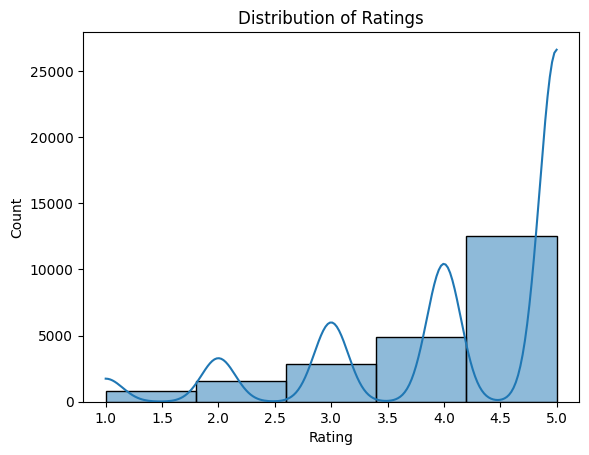

In [18]:
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.show()

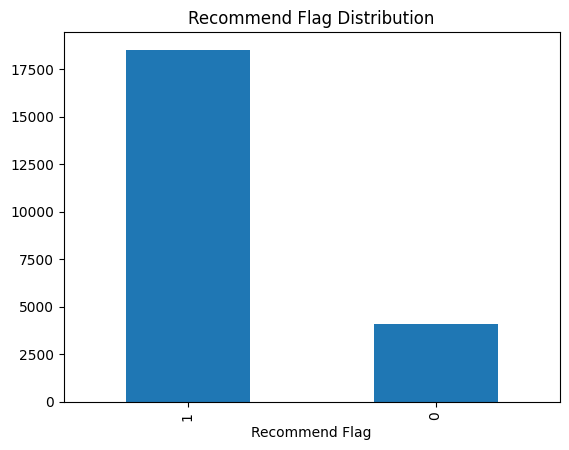

In [19]:
df['Recommend Flag'].value_counts().plot(kind='bar')
plt.title('Recommend Flag Distribution')
plt.show()

 #### Text Cleaning and Preprocessing

In [21]:
import re
import contractions
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
ps = PorterStemmer()
lm = WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words('english')

In [22]:
def convert_lower(text):
    text = text.lower()
    return(text)
def expand_contractions(text):
    text = contractions.fix(text)
    return(text)
def remove_specialchars(text):
    text = re.sub(r'[^a-zA-Z\s+]','',text)
    return(text)
def remove_extraspaces(text):
    text = re.sub(r'\s+',' ',text)
    return(text)
def lemmatize(text):
    text = [lm.lemmatize(word,'v') for word in text.split()]
    return(' '.join(text))
def stem(text):
    text = [ps.stem(word) for word in text.split()]
    return(' '.join(text))
def remove_stopwords(text):
    text = [word for word in text.split() if word not in stop_words]
    return(' '.join(text))

In [23]:
def data_cleaning(text):
    text = convert_lower(text)
    text = expand_contractions(text)
    text = remove_specialchars(text)
    text = remove_extraspaces(text)
    text = lemmatize(text)
    text = remove_stopwords(text)
    return text

In [24]:
df['Cleaned_Review'] = df['Review Text'].apply(data_cleaning)

In [35]:
df.head(2)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Cleaned_Review
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky sexy comfortable
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,love dress sooo pretty happen find store glad ...


#### Word Clouds for Positive & Negative Reviews

In [40]:
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

In [41]:
from wordcloud import WordCloud, STOPWORDS

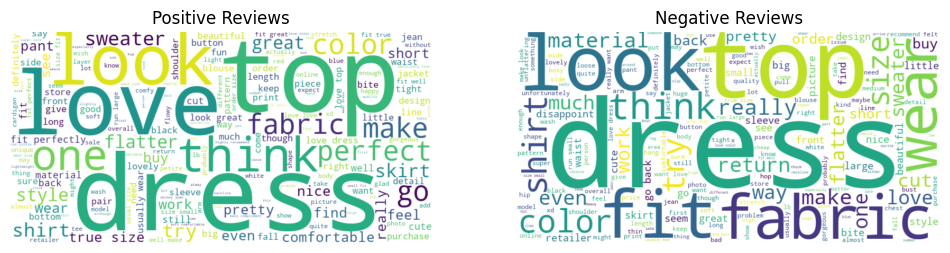

In [46]:
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned_Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['Cleaned_Review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')
plt.show()

#### Frequency Plot of Most Common Words

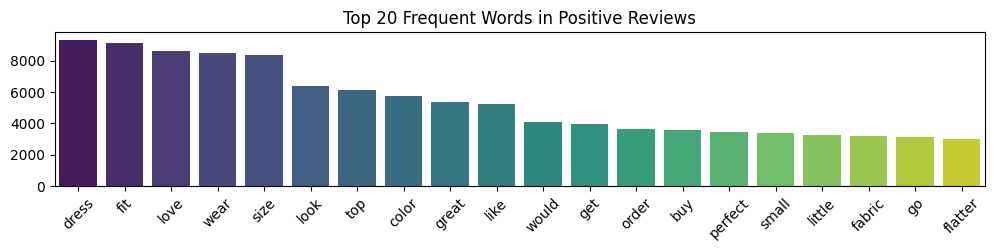

In [104]:
from collections import Counter

positive_words = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned_Review']).split()
word_freq = Counter(positive_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12,2))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('Top 20 Frequent Words in Positive Reviews')
plt.xticks(rotation=45)
plt.show()

#### Sentiment Analysis by Category, Subcategory, Age Group, etc.

By Channel

<Figure size 300x200 with 0 Axes>

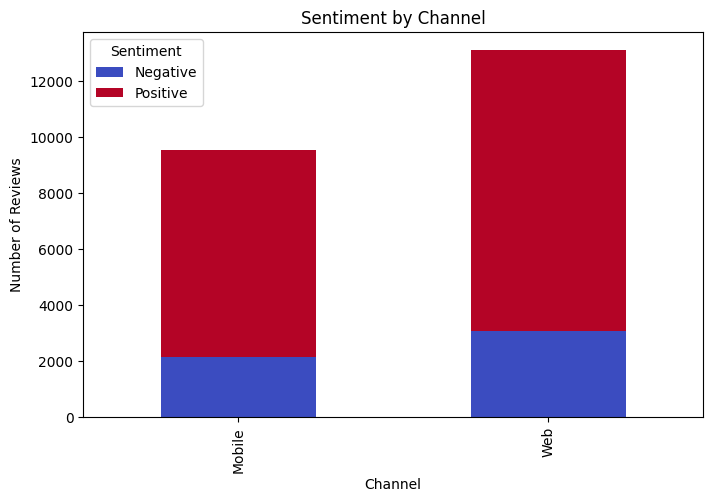

In [112]:
sentiment_channel = df.groupby(['Channel', 'Sentiment']).size().unstack(fill_value=0)
plt.figure(figsize=(3,2))
sentiment_channel.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title('Sentiment by Channel')
plt.ylabel('Number of Reviews')
plt.show()

By Location

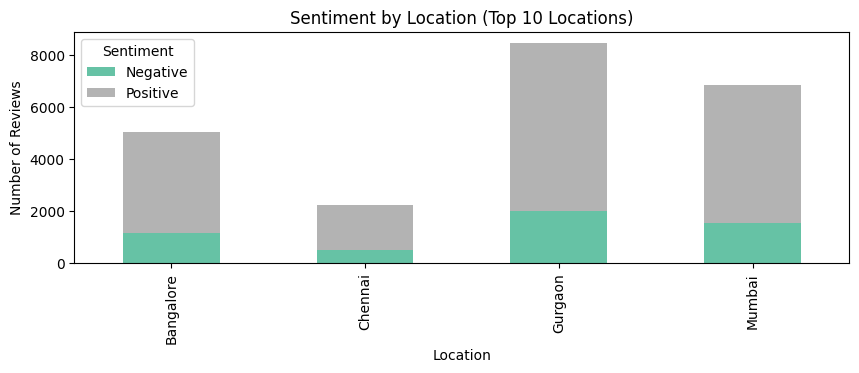

In [114]:
top_locations = df['Location'].value_counts().head(10).index
sentiment_location = df[df['Location'].isin(top_locations)].groupby(['Location', 'Sentiment']).size().unstack(fill_value=0)
sentiment_location.plot(kind='bar', stacked=True, figsize=(10,3), colormap='Set2')
plt.title('Sentiment by Location (Top 10 Locations)')
plt.ylabel('Number of Reviews')
plt.show()

By Category

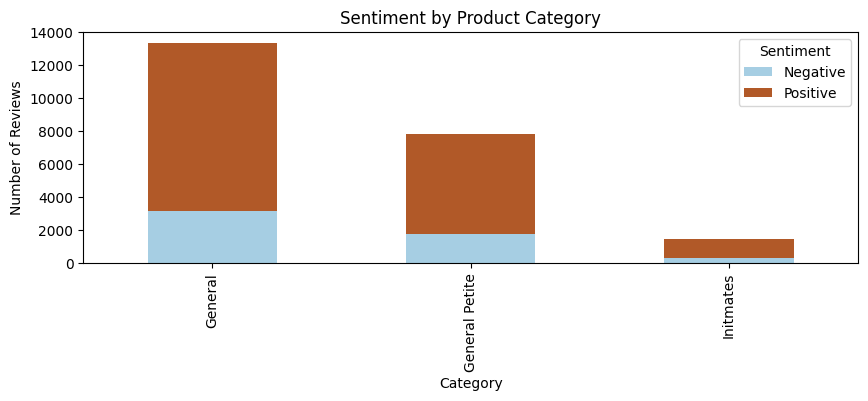

In [116]:
sentiment_category = df.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)
sentiment_category.plot(kind='bar', stacked=True, figsize=(10,3), colormap='Paired')
plt.title('Sentiment by Product Category')
plt.ylabel('Number of Reviews')
plt.show()

By Subcategory

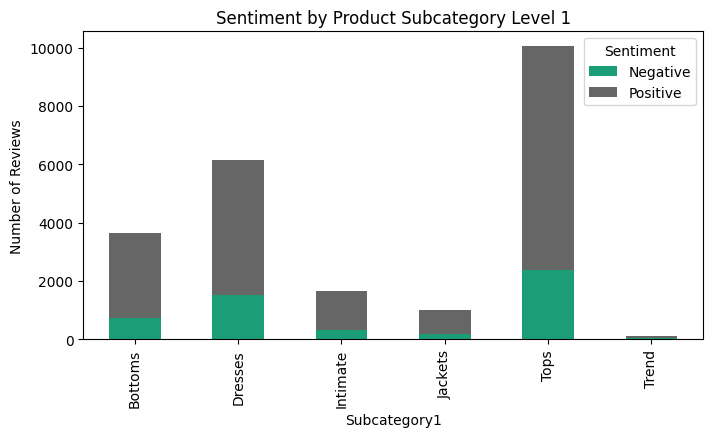

In [120]:
sentiment_subcategory = df.groupby(['Subcategory1', 'Sentiment']).size().unstack(fill_value=0)
sentiment_subcategory.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Dark2')
plt.title('Sentiment by Product Subcategory Level 1')
plt.ylabel('Number of Reviews')
plt.show()

By Customer Age Group

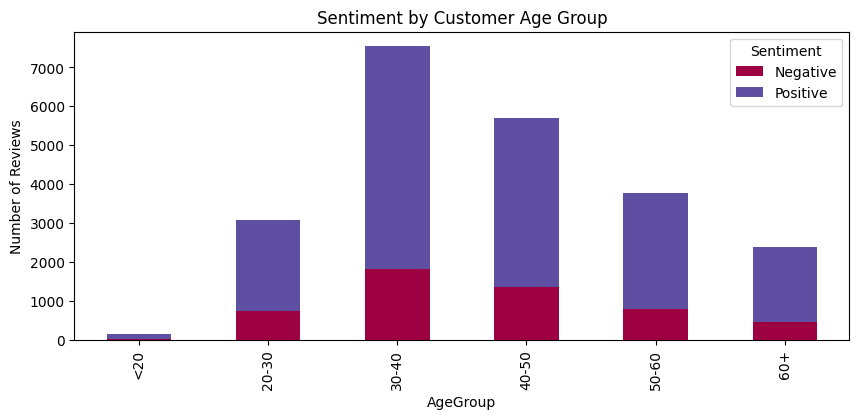

In [122]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['AgeGroup'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

sentiment_age = df.groupby(['AgeGroup', 'Sentiment']).size().unstack(fill_value=0)
sentiment_age.plot(kind='bar', stacked=True, figsize=(10,4), colormap='Spectral')
plt.title('Sentiment by Customer Age Group')
plt.ylabel('Number of Reviews')
plt.show()

#### Topic Modeling

In [135]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(df['Cleaned_Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

for i, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")

Top 10 words for topic #0:
['pair', 'look', 'buy', 'great', 'size', 'fit', 'pant', 'jeans', 'love', 'wear']


Top 10 words for topic #1:
['beautiful', 'flatter', 'comfortable', 'look', 'perfect', 'great', 'fit', 'love', 'wear', 'dress']


Top 10 words for topic #2:
['make', 'order', 'love', 'flatter', 'true', 'color', 'fabric', 'xd', 'fit', 'size']


Top 10 words for topic #3:
['really', 'large', 'dress', 'try', 'order', 'small', 'fit', 'like', 'look', 'size']


Top 10 words for topic #4:
['shirt', 'fit', 'like', 'soft', 'great', 'wear', 'look', 'sweater', 'love', 'color']




#### Predictive Modeling

Predict Recommend Flag

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [139]:
X = df['Cleaned_Review']
y = df['Recommend Flag']

vectorizer = TfidfVectorizer(max_features=5000)
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62       845
           1       0.89      0.97      0.93      3681

    accuracy                           0.88      4526
   macro avg       0.85      0.74      0.77      4526
weighted avg       0.88      0.88      0.87      4526

[[ 423  422]
 [ 106 3575]]
